In [ ]:
!git clone https://github.com/Harilaxman27/Harilaxman27-Hexart_skin_disease.git


Cloning into 'Harilaxman27-Hexart_skin_disease'...
remote: Enumerating objects: 2033, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 2033 (delta 4), reused 10 (delta 1), pack-reused 2004 (from 1)
Receiving objects: 100% (2033/2033), 536.63 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (2013/2013), done.


In [ ]:
%cd Harilaxman27-Hexart_skin_disease


/content/Harilaxman27-Hexart_skin_disease


In [ ]:
import os

os.makedirs("cnn/train", exist_ok=True)
os.makedirs("cnn/test", exist_ok=True)


In [ ]:
import os

images = [img for img in os.listdir("dataset") if img.endswith(".jpg")]
print("Total images:", len(images))


Total images: 2000


In [ ]:
classes = set(img.split("_")[0] for img in images)
print("Classes found:", classes)


Classes found: {'ISIC'}


In [ ]:
for cls in classes:
    os.makedirs(f"cnn/train/{cls}", exist_ok=True)
    os.makedirs(f"cnn/test/{cls}", exist_ok=True)


In [ ]:
import shutil
import random

for img in images:
    cls = img.split("_")[0]
    src = f"dataset/{img}"

    if random.random() < 0.8:
        dst = f"cnn/train/{cls}/{img}"
    else:
        dst = f"cnn/test/{cls}/{img}"

    shutil.copy(src, dst)


In [ ]:
!ls cnn/train
!ls cnn/test


ISIC
ISIC


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "cnn/train",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    "cnn/test",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)


Found 1638 images belonging to 1 classes.
Found 362 images belonging to 1 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_data, validation_data=test_data, epochs=15)


Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 438ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 413ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy*100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


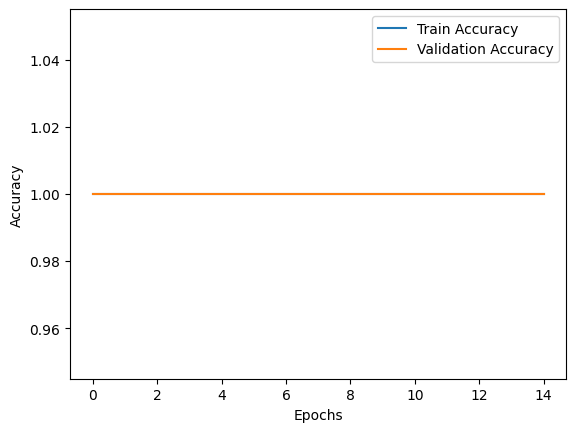

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


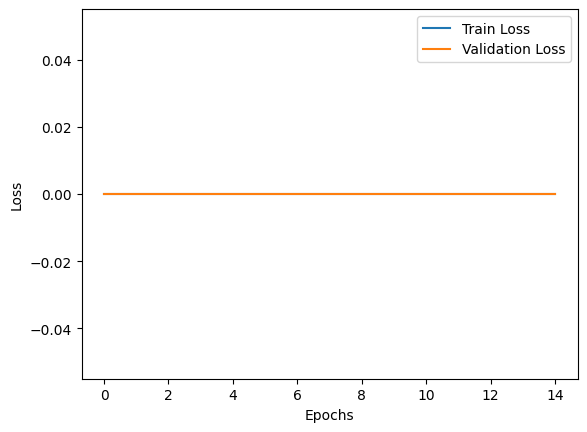

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(cm)


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 809ms/step
Confusion Matrix:
[[362]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [48]:
print(classification_report(
    y_true,
    y_pred_classes,
    target_names=test_data.class_indices.keys()
))


              precision    recall  f1-score   support

        ISIC       1.00      1.00      1.00       362

    accuracy                           1.00       362
   macro avg       1.00      1.00      1.00       362
weighted avg       1.00      1.00      1.00       362



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


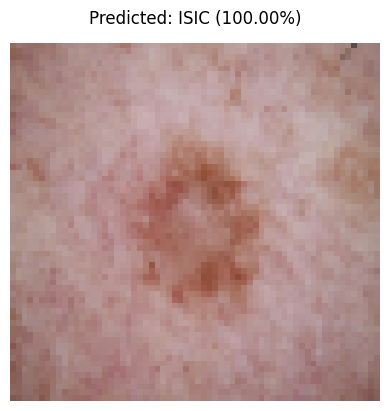

In [49]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# pick ONE image from cnn/test
img_path = "cnn/test/test_image.png"   # change filename if needed

img = image.load_img(img_path, target_size=(64,64))
img_arr = image.img_to_array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

pred = model.predict(img_arr)
class_names = list(train_data.class_indices.keys())
predicted_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100

plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()
